## Docker

Docker is a containerization platform that enables applications to run in virtualized environments called containers.<br>
Containers provide isolation, allowing multiple applications with different requirements to run on the same server without conflict.<br><br>
Benefits of Docker<br>
- Docker containers run the same way anywhere. This allows developers to create applications locally and deploy them on servers without environment-related issues.<br>
- Docker containers are lighter than virtual machines<br>
- Docker simplifies deploying and scaling containerized applications.<br><br><br><br><br>

### How to install Docker
Docker provides straightforward installation instructions for different operating systems, so you can easily get started, even if you're new to Docker.<br><br>
[Docker installation](https://www.docker.com/get-started/)<br><br><br>

Check if docker is successfully installed in your computer.<br><br>
- Open terminal.
- Use ```docker --version``` command<br><br><br><br><br>



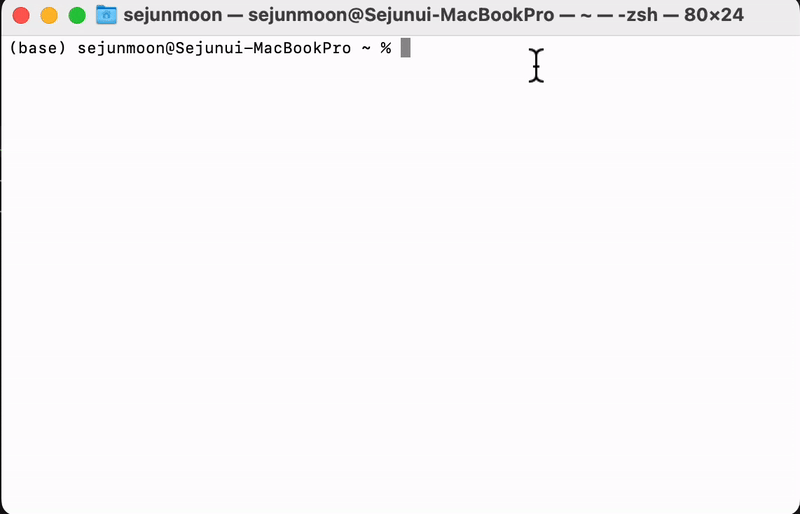

In [13]:
def show_gif(fname, width=None, height=None):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
        
    size_attributes = ""
    if width:
            size_attributes += f'width="{width}" '
    if height:
            size_attributes += f'height="{height}" '
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" {size_attributes} />')

show_gif('gifs/dockerversioncheck.gif', width = 450, height=300)

<hr/>

## Required Files for Setting Up Ubuntu in Docker

You need three files to set ubuntu linux in Docker. (Dockerfile, docker-compose.yml, bootstrap.sh)<br><br>
1-1. Dockerfile<br>
1-2. docker-compose.yml<br>
1-3. bootstrap.sh<br><br>


<hr/>

##### 1-1. Dockerfile

```FROM ubuntu:22.04```<br>
Your Docker image will be built on top of an Ubuntu 22.04 environment<br><br><br><br><br>


```ARG DEBIAN_FRONTEND=noninteractive```<br><br>
```ARG DEBIAN_FRONTEND=noninteractive``` sets an environment variable ```DEBIAN_FRONTEND``` to ```noninteractive```.<br><br>
This configuration tells that the package manager to **bypass any prompts** or questions that would normally require user input. (unnecessary)<br><br><br><br><br>

```RUN apt-get update && apt-get install -y \```<br>
```    openssh-server sudo systemd systemd-sysv net-tools tcpdump ethtool plocate man-db vim traceroute fdisk dnsutils iputils-ping cron jq \```<br>
```    && apt-get clean \```<br>
```    && rm -rf /var/lib/apt/lists/*```<br><br>


1. ```apt-get update```<br><br>
This command fetches the latest package information from the configured repositories to ensure that the latest versions of packages can be installed.<br><br>


2. ```apt-get install-y [utilities you want to install]```<br><br>
Installs various utilities using the ```apt-get install``` command with the ```-y``` option, which automatically answers "yes" to any prompts. (required for non-interactive installation in Docker).<br><br>
- **openssh-server**: Enables SSH access to the container.<br>
- **sudo**: Allows granting temporary adimn privileges.<br>
- **systemd** and **systemd-sysv**: Provide system management utilities.<br>
- **net-tools**, **tcpdump**, **ethtool**: Provide network management and diagnostic tools.<br>
- **plocate**: Efficient file location tool, similar to **locate**.<br>
- **man-db**: Allows access to manual pages<br>
- **vim**: A text editor.<br>
- **traceroute**: Diagnostic tool for tracing the path of network packets.<br>
- **fdisk**: Partition management tool.<br>
- **dnsutils**: Utilities for DNS lookups.<br>
- **inputils-ping**: Network diagnostic tool for pinging.<br>
- **cron**: For scheduling jobs.<br>
- **jq**: A tool for parsing and formatting JSON data.<br><br>


3. ```apt-get clean```<br><br>
Cleans up downloaded package files to save space in the Docker image.<br><br>


4. ```rm -rf /var/lib/apt/lists/*```<br><br>
Deletes the package list cache to further reduce image size.<br><br><br><br><br>


```RUN apt-get update && apt-get install -y chrony && apt-get clean && rm -rf /var/lib/apt/lists/*```<br><br>
**chrony** is a software package for **Network Time Protocol (NTP)**, which keeps the system's clock synchronized with NTP servers.<br><br>
&emsp;In Ubuntu 22.04, Chrony is recommended as the default NTP service rather than ntp.<br><br><br><br><br>

```RUN useradd -rm -d /home/ubuntu -s /bin/bash -g root -G sudo -u 1001 ubuntu```<br>
```RUN echo "password" | openssl passwd -1 -stdin | xargs -I {} usermod -p {} ubuntu```<br><br>
Add the user named 'ubuntu' and sets a password for it within the Docker container.<br>
In addition, set specific settings, such as home directory, shell, gorup, and sudo privileges.<br><br><br>
1. ```useradd```: create a new user.
- **rm**: Remove's the user's home directory if it exists, then specifies a home directory for the user.<br>
- **-d/home/ubuntu**: Sets ```/home/ubuntu``` as the home directory for the ubuntu user.<br>
- **-s/bin/bash**: Sets ```/bin/bash``` as the default shell for the user.<br>
- **-g root**: Sets ```root``` as the user's primary group.<br>
- **-G sudo**: Adds the ubuntu user to the ```sudo``` group.<br>
- **-u 1001**: Assigns the user ID ```1001``` to the ubuntu user.<br><br><br>
2. ```echo "password"```: This is your password.
- **openssl passwd -1 -stdin**: Uses the MD5 algorithm to hash the password.<br>
- **xargs -I {} usermod -p {} ubuntu**: Receives the hashed password and applies it to the ubuntu user using the ```usermod -p``` command.<br><br>


 Why Assign User ID 1001?
In many systems, the user ID 1000 is is usually assigned to the first non-root user created.<br> 
By setting the ubuntu user to have the ID 1001, it avoids conflicts with any user.<br><br><br><br><br>

```RUN mkdir -p /var/run/sshd```<br>
```RUN sed -i 's/#PermitRootLogin prohibit-password/PermitRootLogin yes/' /etc/ssh/sshd_config```<br><br>
Set SSH connection<br><br>
1. ```RUN mkdir -p /var/run/sshd```<br>
Creates the directory ```/var/run/sshd```, which is required for the SSH daemon to run properly.<br><br>
2. ```RUN sed -i 's/#PermitRootLogin prohibit-password/PermitRootLogin yes/' /etc/ssh/sshd_config```<br>
- ```/etc/ssh/sshd_config```: This command modifies the SSH configuration file.<br>
- ```sed``` is for finding the line ```#PermitRootLogin prohibit-password``` and changing it to ```PermitRootLogin yes```.<br><br><br><br><br>


```RUN sed -i 's/UsePAM yes/UsePAM no/' /etc/ssh/sshd_config```<br><br>
Modifies the SSH configuration to prevent users from being immediately disconnected after logging in via SSH.<br><br>
- Setting ```UsePAM``` to **no** disables PAM for SSH sessions, which can resolve issues in certain containerized environments (Docker) where PAM may cause SSH sessions to be terminated immediately after login.<br><br><br><br><br>

```EXPOSE 22```<br><br>
Tells Docker to expose port 22 to allow SSH connections to the container.<br><br><br><br><br>

```RUN apt-get update && apt-get install -y dumb-init && apt-get clean && rm -rf /var/lib/apt/lists/*```<br><br>
Installs ```dumb-init```, a lightweight init system that helps manage processes within the container.<br><br><br><br><br>

```COPY bootstrap.sh /root/```<br>
```RUN chmod +x /root/bootstrap.sh```<br><br>

```ENTRYPOINT ["/usr/bin/dumb-init", "--"]```<br><br><br>
Copies the ```bootstrap.sh``` script from the local directory into the container's ```/root/``` directory, and makes it executable.<br><br>
Sets up ```dumb-init``` as the entry point for the container.<br><br><br><br><br>

DockerFile

<hr/>

##### 1-2. docker-compose.yml

Set up Ubuntu container on which SSH services run<br><br><br><br>

```version: "3.9"```<br><br>

```services:```<br>
```  ubuntu:```<br>
```    build: .```<br>
```    ports:```<br>
```      - "2222:22"```<br>
```    command: sh -c "service ssh start && tail -f /dev/null"```<br><br>

- ```build: .```<br><br>
Specifies that the Dockerfile in the current directory (.) should be used to build this container image.<br><br>
- ```ports```<br><br>
Connect to the container's SSH service via **local host:2222** on the host machine.<br><br>
- ```command: sh -c "service ssh start && tail -f /dev/null"```<br><br>
```service ssh start```: Starts the SSH service within the container, allowing SSH connections.<br>
```&&tail -f /dev/null```: Keeps the container running indefinitely by reading the empty file ```/dev/null```.<br><br><br><br><br>

docker-compose.yml

<hr/>

##### 1-3. bootstrap.sh

An initial script that runs automatically when a container starts, starting essential services such as SSH, and ensuring that the container continues to run without shutting down<br><br><br>

```#!/bin/bash```<br><br>

```#Start the SSH service```<br>
```service ssh start```<br><br>

```#Keep the container running```<br>
```tail -f /dev/null```<br><br><br>

```#!/bin/bash```: Indicates that this script should be run using the ```bash shell```.

bootstrap.sh

<hr/>

## Guide to Docker-based Ubuntu 22.04 Setup

1. Go to the directory where the Dockerfile, docker-compose.yml, and bootstrap.sh files are located.<br><br>


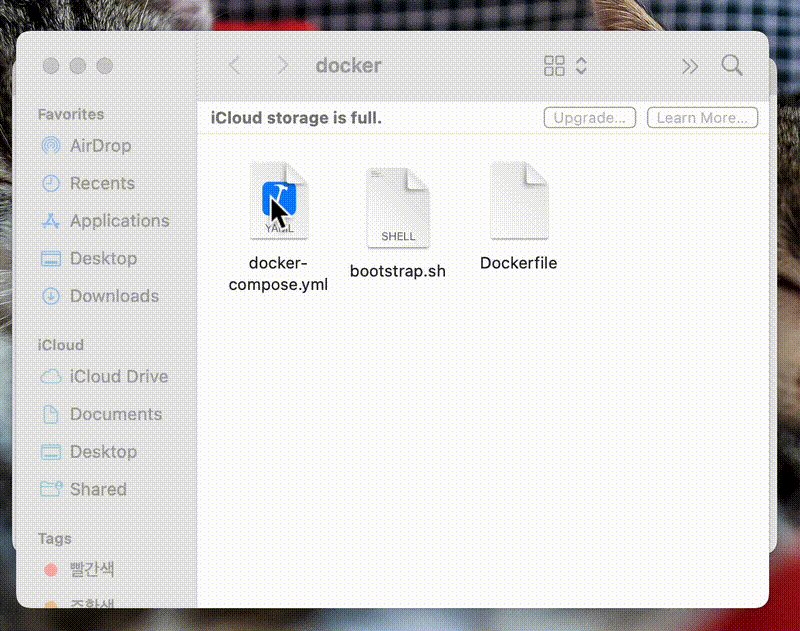

In [14]:
show_gif('gifs/gotodirectory.gif', width = 450, height=300)

2. Make sure that the Docker Desktop application is running on your computer.<br><br>
You can check it with the command: ```docker info```<br><br>
If Docker Desktop is not running, you will see an error like the one below.<br><br>


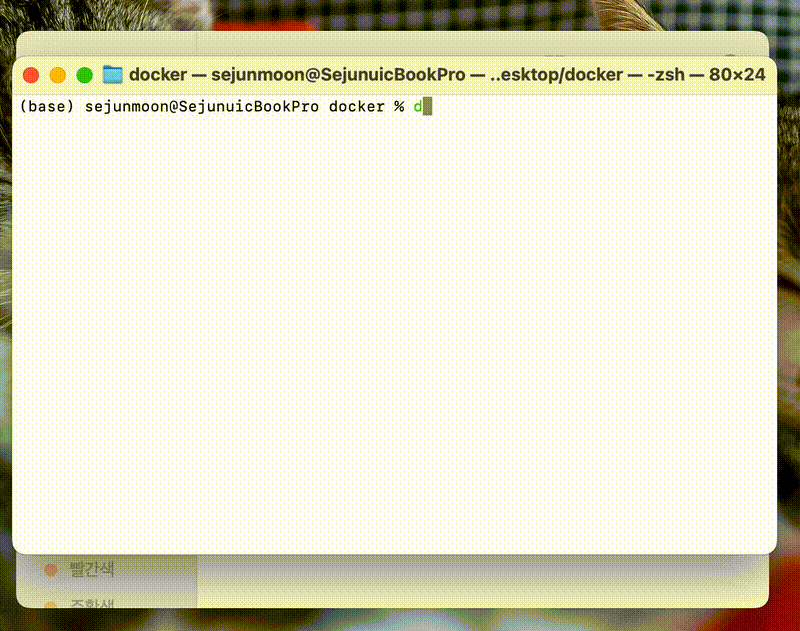

In [16]:
show_gif('gifs/check.gif', width = 450, height=300)

3. Open the Docker Desktop<br><br>
Start the Docker Desktop using the command: ```open -a Docker``` <br><br>
This will start Docker Desktop, which is necessarty to build the Ubuntu image.<br><br>


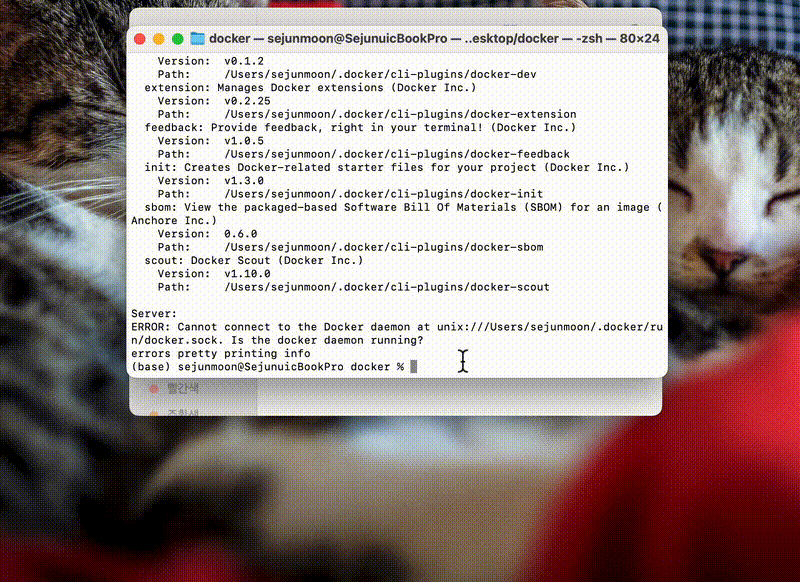

In [17]:
show_gif('gifs/open.gif', width = 450, height=300)

4. Build your Docker image.<br><br>
```docker-compose up --build -d```: This command builds an image for each service defined in docker-compose.yml<br><br> #docker compose up --build -d



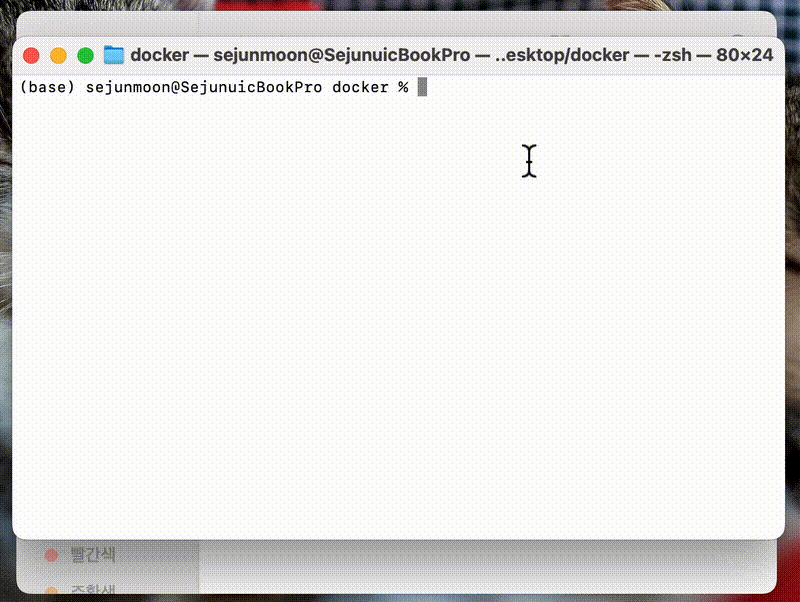

In [36]:
show_gif('gifs/composeup.gif', width = 450, height=300)

5. Check that the container is running normally<br><br>
You can view the list of currently running containers.<br><br>
```docker ps```: This command displays all currently running Docker containers.<br><br>


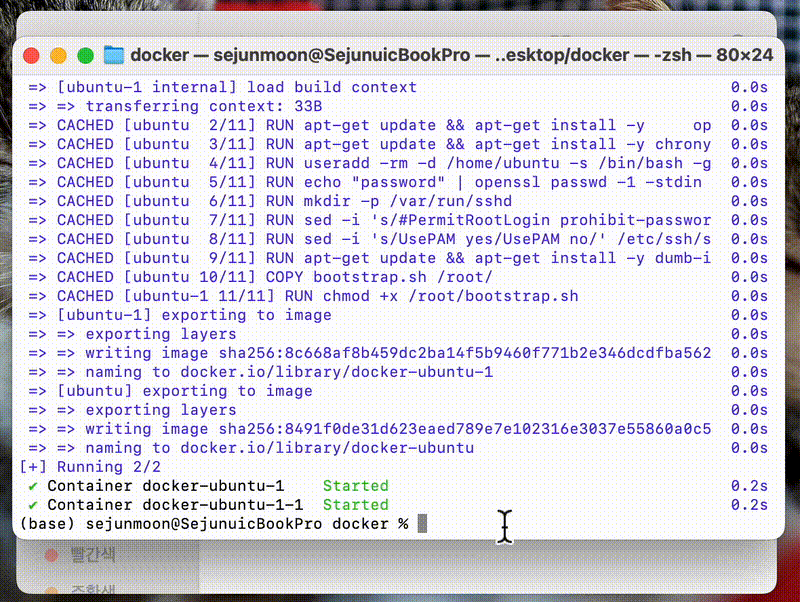

In [19]:
show_gif('gifs/ps.gif', width = 450, height=300)

6. Access the container you want<br><br>
```docker exec -it <container ID> /bin/bash```: Directly connect to the container's shell.<br><br>

&emsp;&emsp;&ensp;&nbsp;```ssh -p <port number> <user>@<host IP address>```: Connect to the container via SSH. (Alternative connection method)<br><br>


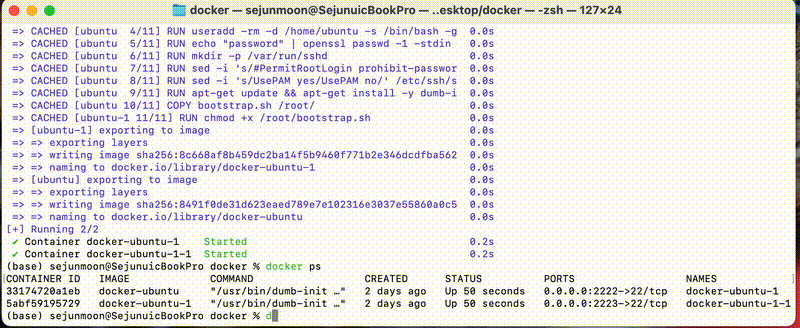

In [33]:
show_gif('gifs/execute.gif', width = 700, height=270)

<br><br>If you successfully followed all the steps above, you should now be able to use Ubuntu 22.04 via Docker.<br><br>
